# 20 Working with Web Feature Services

In computing, the Open Geospatial Consortium Web Feature Service (WFS) Interface Standard provides an interface allowing requests for geographical features across the web using platform-independent calls. One can think of geographical features as the "source code" behind a map, whereas the WMS interface or online tiled mapping portals like Google Maps return only an image, which end-users cannot edit or spatially analyze. The XML-based GML furnishes the default payload-encoding for transporting geographic features, but other formats like shapefiles can also serve for transport. 

Source: https://en.wikipedia.org/wiki/Web_Feature_Service


<img src="../images/tutorial20_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/20_working_with_web_feature_services/'

## Loading the WFS Service

For this example, we are downloading a WFS Service provided by the 
[Landesamt für Bergbau, Energie und Geologie - Niedersachsen](#https://www.lbeg.niedersachsen.de/startseite/). It contains Polygon, Line and Point data about seismic surveys and wells in Northern Germany. 

In [2]:
import gemgis as gg
wfs = gg.web.load_wfs("https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=476&Service=WFS&")

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
type(wfs)

owslib.feature.wfs100.WebFeatureService_1_0_0

#### Checking the version of the WFS

In [4]:
wfs.version

'1.0.0'

#### Checking the version of the WFS

In [5]:
wfs.identification.version

'1.0.0'

#### Checking the identification type of the WFS

In [6]:
wfs.identification.type

'Geophysik und Tiefohrungen'

#### Checking the title of the WFS

In [7]:
wfs.identification.title

'Geophysik und Tiefohrungen'

#### Checking the abstract of the WFS

In [8]:
wfs.identification.abstract

'Geophysik und Tiefohrungen'

#### Checking the contents of the WFS

In [9]:
list(wfs.contents)

['iwan:L383']

#### Checking the title of the WFS layer

In [10]:
wfs['iwan:L383'].title

'Gravimetrie'

#### Checking the bounding box of the WFS layer

In [11]:
wfs['iwan:L383'].boundingBoxWGS84

(5.395175801132899, 47.16510247399335, 17.002272548448747, 54.85398076006902)

#### Checking the operations for the WFS

In [12]:
[op.name for op in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

#### Checking the format for getting the feature

In [13]:
wfs.getOperationByName('GetFeature').formatOptions

['{http://www.opengis.net/wfs}GML2']

#### Checking the format for describing the feature

In [14]:
wfs.getOperationByName('DescribeFeatureType').formatOptions

[]

#### Checking the format for getting the capabilities

In [15]:
wfs.getOperationByName('GetCapabilities').formatOptions

[]

#### Requesting data from the WFS

In [16]:
feature = gg.web.load_as_gpd("https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=476&Service=WFS&")

#### Checking the head of the data

In [17]:
feature.head()

,gml_id,OBJECTID,ID,SURVEYNAME,ARCHIV,MESSJAHR,OPERATOR,OP_NACHFOL,MESSFIRMA,MESSPUNKTE,UP_DATE,geometry
0,1541,1541,112,Jemgum 2007,0127494,2007,GdF Produktion Exploration Deutschland GmbH,Neptune Energy Deutschland GmbH,Geophysik und Geotechnik Leipzig GmbH,1340,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32395246.839 5907777.660, 3239..."
1,1542,1542,111,Sagermeer 2005,0125831,2005,ExxonMobil Production Deutschland GmbH,ExxonMobil Production Deutschland GmbH,Comp. Generale Geophysique,2803,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32446717.522 5856710.088, 3244..."
2,1543,1543,120,Hümmling 2013,0131520,2013,GDF SUEZ E&P DEUTSCHLAND GMBH,Neptune Energy Deutschland GmbH,Deutsche Montan Technologie GmbH,342,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32416592.825 5852885.544, 3241..."
3,1544,1544,49,Rotenburg/Wümme (1984),0112162,1984,Deutsche Texaco AG Aufschluss und Gew.,Wintershall Dea Deutschland AG,Prakla Seismos,2184,2020-01-20T00:00:00+01:00,"POLYGON ((32545955.921 5896473.525, 32544536.2..."
4,1545,1545,102,Odisheim 1989/90,0112092,1989,BEB Erdgas und Erdöl GmbH,BEB Erdgas und Erdöl GmbH & Co. KG,Prakla Seismos,2824,2020-01-20T00:00:00+01:00,"POLYGON ((32504255.640 5967591.298, 32503387.8..."


#### Plotting the data

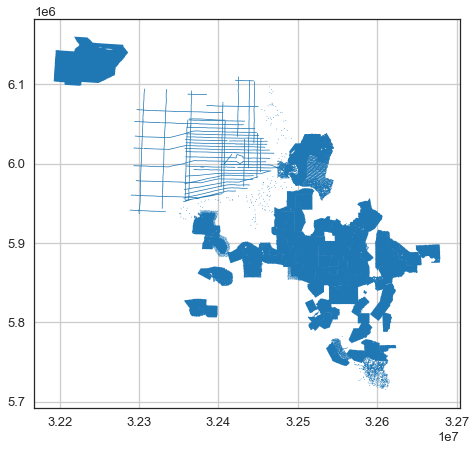

In [18]:
import matplotlib.pyplot as plt

feature.plot()
plt.grid()